In [1]:
#water malon 써서 어떤 건지 보여주자/

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import make_pipeline

In [52]:
X = pd.read_csv("Data_for_Final_Project_PAC2021_Spring_Challenge/IXI_train.csv")
X_abs_test = pd.read_csv("Data_for_Final_Project_PAC2021_Spring_Challenge/IXI_test.csv")
X_Cobre_test = pd.read_csv("Data_for_Final_Project_PAC2021_Spring_Challenge/COBRE_test_scz.csv")
maping = pd.read_csv("Data_for_Final_Project_PAC2021_Spring_Challenge/thickness_order.csv")
X_Cobre_test["ICV"] = X_Cobre_test["ICV"] / 1000
#predict에서 scaling 할 때, training set의 mean과 variance를 사용하기 때문에 1000으로 나눔
non_sex_mask = np.isnan(X["Sex"])
non_age_mask = np.isnan(X["Age"])
non_mask = np.logical_or(non_sex_mask, non_age_mask)
X_impute = X[~non_mask]
index_target = ['ID', "Age"]
X_train = X_impute.drop(index_target,axis=1)
y_train = X_impute["Age"]
X_Cobre_test = X_Cobre_test.drop(index_target,axis=1)
X_abs_test = X_abs_test.drop(index_target,axis=1)
#change feature order of Cobre
order_list = [feature[0] for feature in maping.values.tolist()]
X_Cobre_test = X_Cobre_test[order_list]
X_Cobre_test.columns = X_abs_test.columns


# ignore_target = ["lposteriorcingulate", "rposteriorcingulate"]
# X_train = X_train.drop(ignore_target,axis=1)
# X_Cobre_test = X_Cobre_test.drop(ignore_target, axis=1)
# X_abs_test = X_abs_test.drop(ignore_target,axis=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

X_train


,Sex,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,rcuneus,lentorhinal,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
424,2.0,2.350439,2.438501,2.330920,2.218590,2.623906,2.628707,1.897194,1.892607,2.689670,...,2.422516,2.487390,2.478839,3.948034,3.515649,2.400976,2.136221,2.823123,2.634806,1254.11
275,2.0,2.526938,2.622772,2.413752,2.355444,2.449064,2.519600,1.831286,1.758677,3.455567,...,2.417768,2.528387,2.553493,4.150218,3.746710,2.271073,2.345540,3.050250,3.072135,1355.40
57,2.0,2.499878,2.765791,2.216268,2.394367,2.549177,2.486484,1.849377,1.798568,3.291413,...,2.659445,2.822387,2.568592,3.905307,3.435651,2.420797,2.291998,3.045274,3.185844,1528.51
203,2.0,2.592207,2.790843,2.605902,2.652313,2.596041,2.705718,1.967224,1.940719,3.025562,...,2.422216,2.618606,2.721547,2.980933,3.532418,2.599631,2.459573,2.856152,2.600812,1599.95
179,2.0,2.364246,2.364349,2.361581,2.299071,2.136884,2.119079,1.602719,1.613585,2.831879,...,2.128209,2.425455,2.459582,2.710726,3.267499,1.868931,1.816608,2.776697,2.452546,1156.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2.0,2.642753,2.775107,2.644495,2.519687,2.710362,2.687589,1.843285,1.753212,3.243737,...,2.530703,2.669525,2.609951,3.438865,3.567766,2.186095,2.350870,3.063999,3.009687,1300.99
280,2.0,2.147901,2.276953,2.106467,2.271479,2.419831,2.288773,1.702464,1.736386,3.035074,...,2.221267,2.621227,2.469981,3.289810,3.784249,1.955565,1.865600,2.784338,2.915954,1381.40
360,1.0,2.396118,2.456294,1.866484,2.162944,2.550997,2.597826,1.918909,1.849959,2.613953,...,2.650511,2.771911,2.620536,2.805717,3.462687,2.466151,2.961332,2.990748,3.237987,1799.58
448,2.0,2.311447,2.697721,2.113900,2.166989,2.456476,2.593121,1.667404,1.619689,2.998955,...,2.436324,2.639132,2.368647,3.451537,2.848090,2.050863,1.966681,2.936127,2.779218,1243.31


In [46]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer


OHE = OneHotEncoder(drop='first')
#print(pd.DataFrame(OHE.fit_transform(X_train)))


std_preprocessing = make_pipeline( StandardScaler())


standard_preprocess = make_column_transformer((OHE, ["Sex"]),
                                      remainder=std_preprocessing)
standard_preprocess.fit(X_train)
standard_preprocess.named_transformers_
pd.DataFrame(standard_preprocess.transform(X_train))


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.0,-0.700361,-0.752040,-0.001796,-0.458183,0.528550,0.486156,0.461218,0.563596,-1.020637,...,-0.344606,-0.564361,-0.297633,1.575021,0.576634,0.470522,-0.553611,-0.542341,-1.679855,-1.191258
1,1.0,0.358182,0.320594,0.375273,0.264859,-0.660173,-0.238434,0.011673,-0.334255,1.280936,...,-0.382066,-0.358205,0.094112,2.161513,1.253015,-0.034432,0.163267,0.738943,0.659974,-0.554554
2,1.0,0.195891,1.153104,-0.523718,0.470501,0.020478,-0.458362,0.135065,-0.066832,0.787642,...,1.524609,1.120165,0.173344,1.451079,0.342459,0.547569,-0.020105,0.710875,1.268350,0.533608
3,1.0,0.749631,1.298930,1.249981,1.833318,0.339101,0.997590,0.938884,0.886135,-0.011260,...,-0.346973,0.095457,0.975983,-1.230330,0.625723,1.242725,0.553812,-0.356015,-1.861730,0.982677
4,1.0,-0.617554,-1.183674,0.137779,-0.032981,-2.782628,-2.898330,-1.547356,-1.306939,-0.593290,...,-2.666509,-0.875796,-0.398683,-2.014143,-0.149767,-1.597628,-1.648232,-0.804237,-2.654995,-1.801813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1.0,1.052781,1.207331,1.425664,1.132609,1.116349,0.877197,0.093511,-0.370891,0.644371,...,0.508921,0.351502,0.390379,0.098033,0.729196,-0.364758,0.181521,0.816506,0.325860,-0.896572
366,1.0,-1.915070,-1.692400,-1.023552,-0.178754,-0.858924,-1.771375,-0.867009,-0.483696,0.017324,...,-1.932342,0.108640,-0.344114,-0.334343,1.362901,-1.260868,-1.480442,-0.761133,-0.175634,-0.391119
367,0.0,-0.426403,-0.648464,-2.116006,-0.752184,0.032855,0.281072,0.609338,0.277690,-1.248174,...,1.454133,0.866350,0.445922,-1.738594,0.421602,0.723866,2.272251,0.403280,1.547327,2.237542
368,1.0,-0.934212,0.756869,-0.989715,-0.730810,-0.609779,0.249824,-1.106150,-1.266019,-0.091216,...,-0.235671,0.198674,-0.875866,0.134791,-1.377493,-0.890427,-1.134258,0.095148,-0.907207,-1.259146


In [47]:
#demension reduction
#LDA is for Classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


saved!


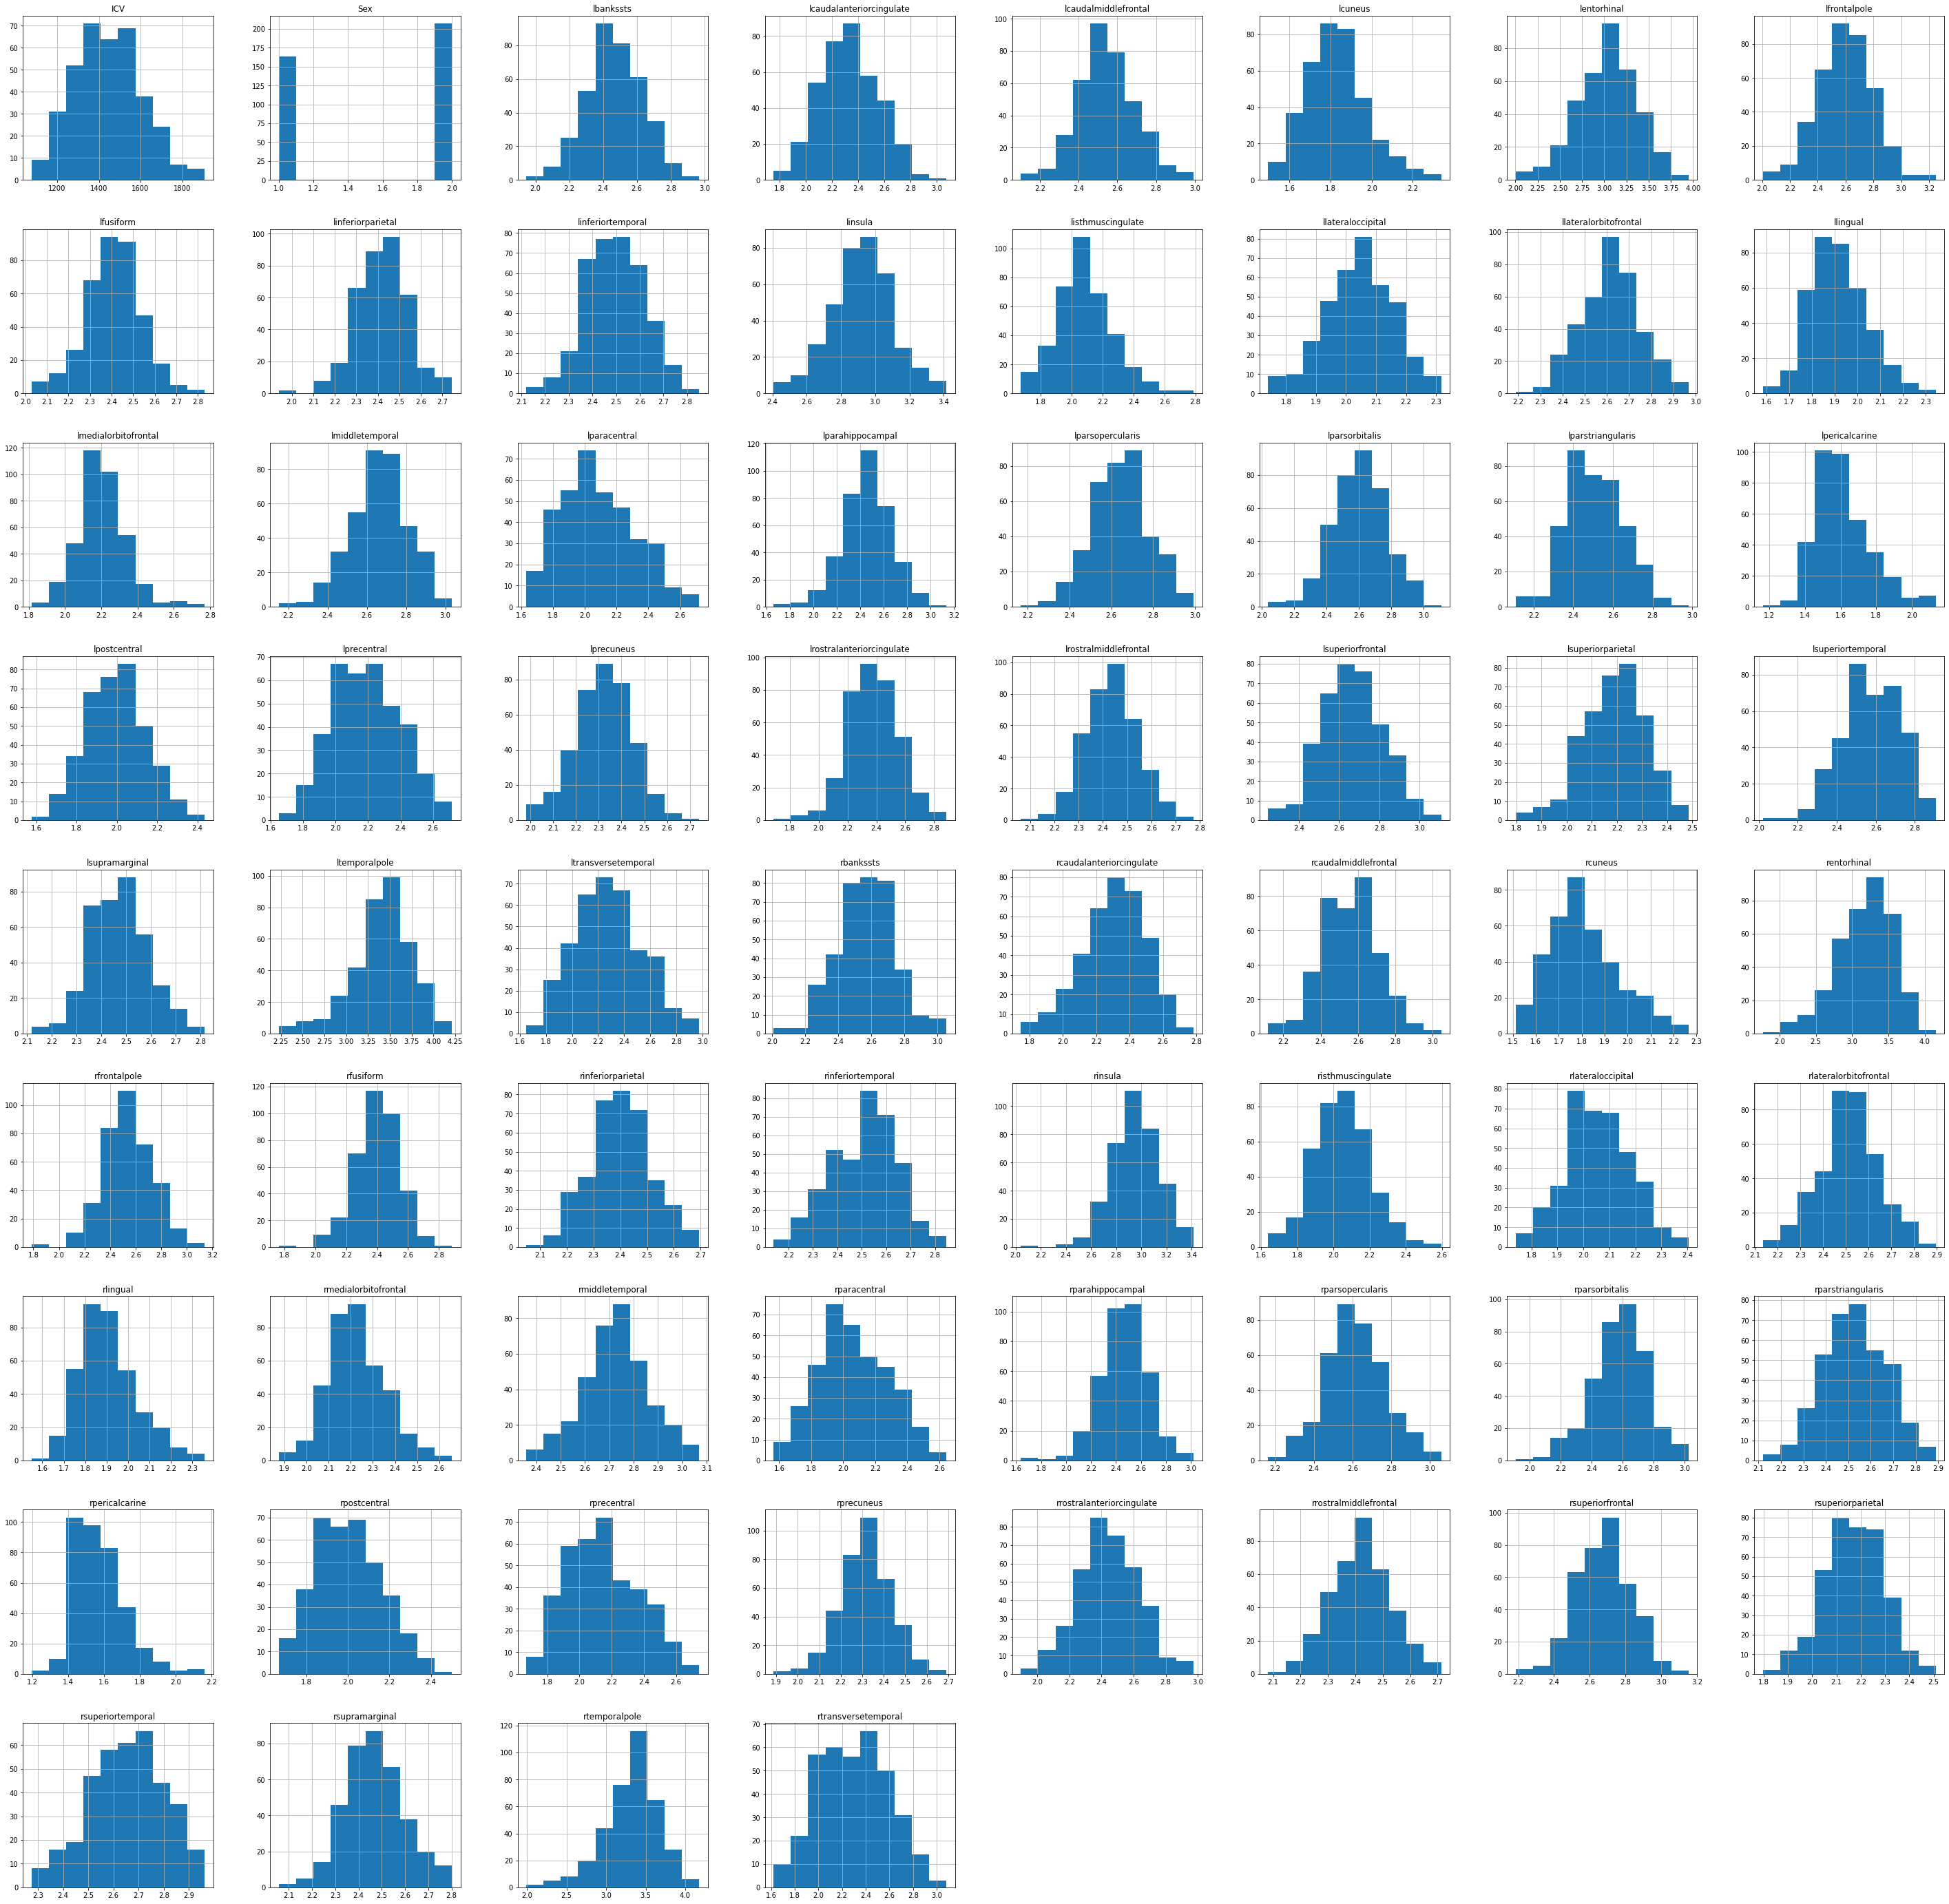

In [48]:
#data distribution visualize
X_train.hist(figsize=(50,50))
#plt.savefig("images/feature_data_distribution.png")
print("saved!")

saved!


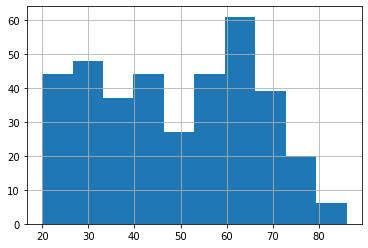

In [49]:
y_train.hist()
#plt.savefig("images/target_distrubution.png")
print("saved!")

saved!


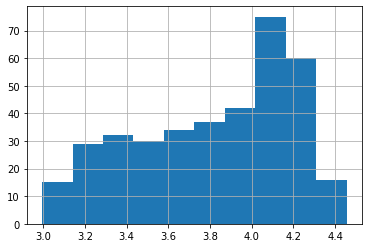

In [50]:
np.log(y_train).hist()
#plt.savefig("mages/log_target_distribution.png")
print("saved!")


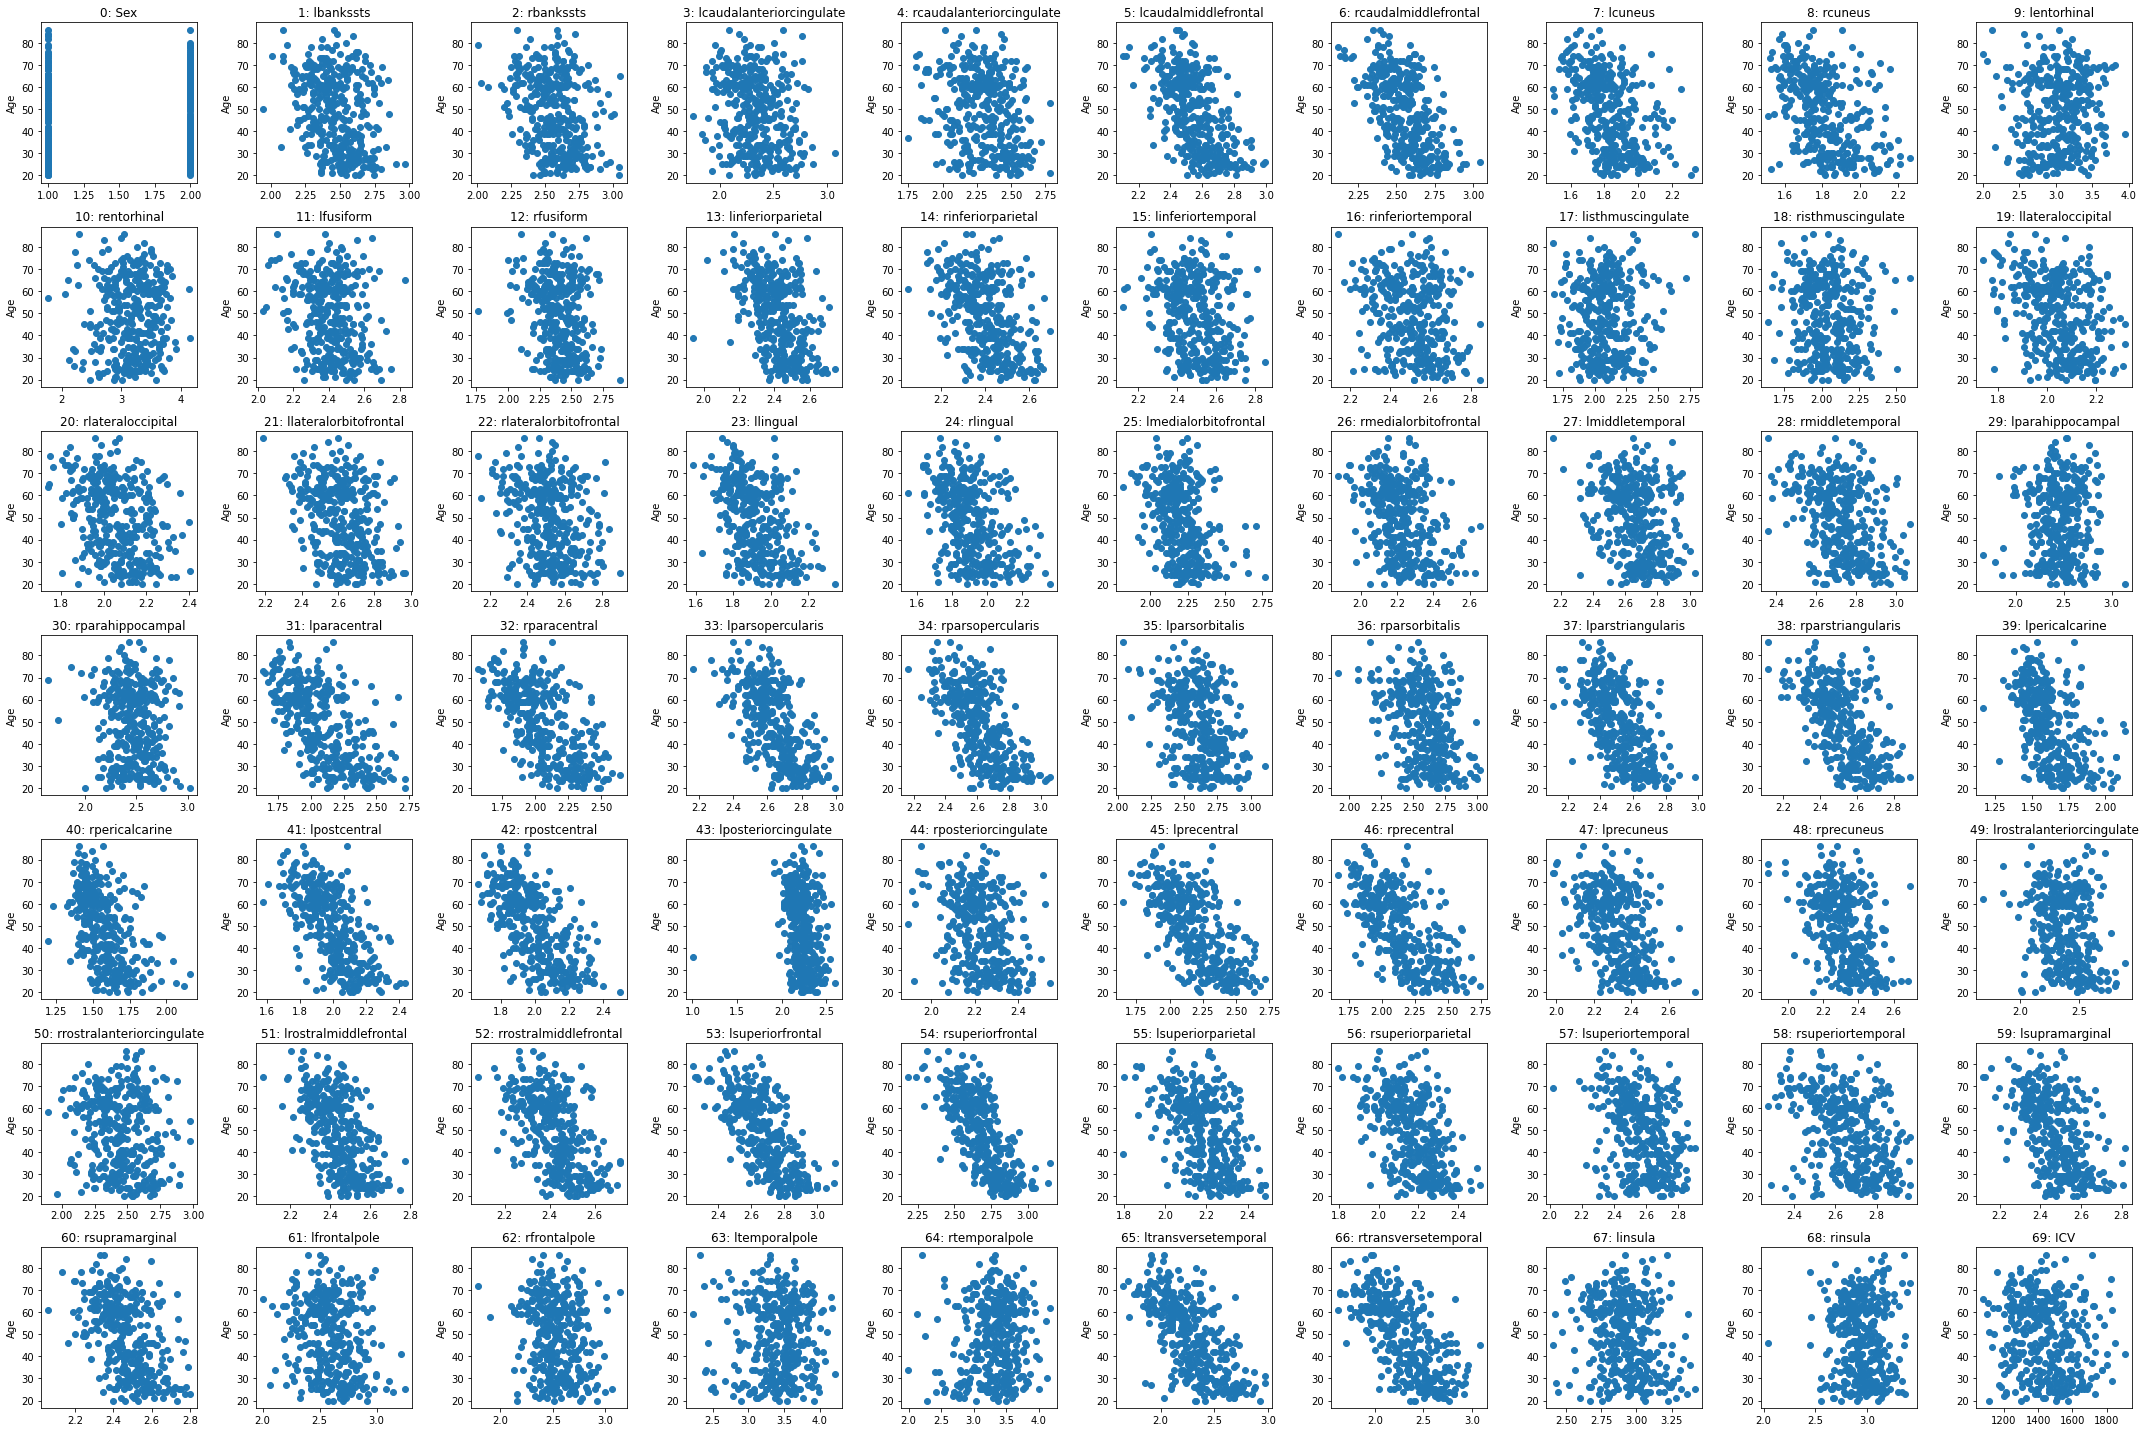

In [9]:
# visualize each feature to data
# 정규분포 모양이나, 나이가 많을수록 얇은 경향이 있다. 젊을수록 두꺼운 것이 많다.
# kernel svm? or linear regression이 효과적일 것이다. tree보다는
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7, 10, figsize=(30, 20))

for i, ax in enumerate(axes.ravel()):
    ax.plot(X_train.iloc[:, i], y_train, 'o', alpha=5)
    ax.set_title("{}: {}".format(i, X_train.columns[i]))
    ax.set_ylabel("Age")
plt.tight_layout()
plt.savefig("images/Data_distribution.png")


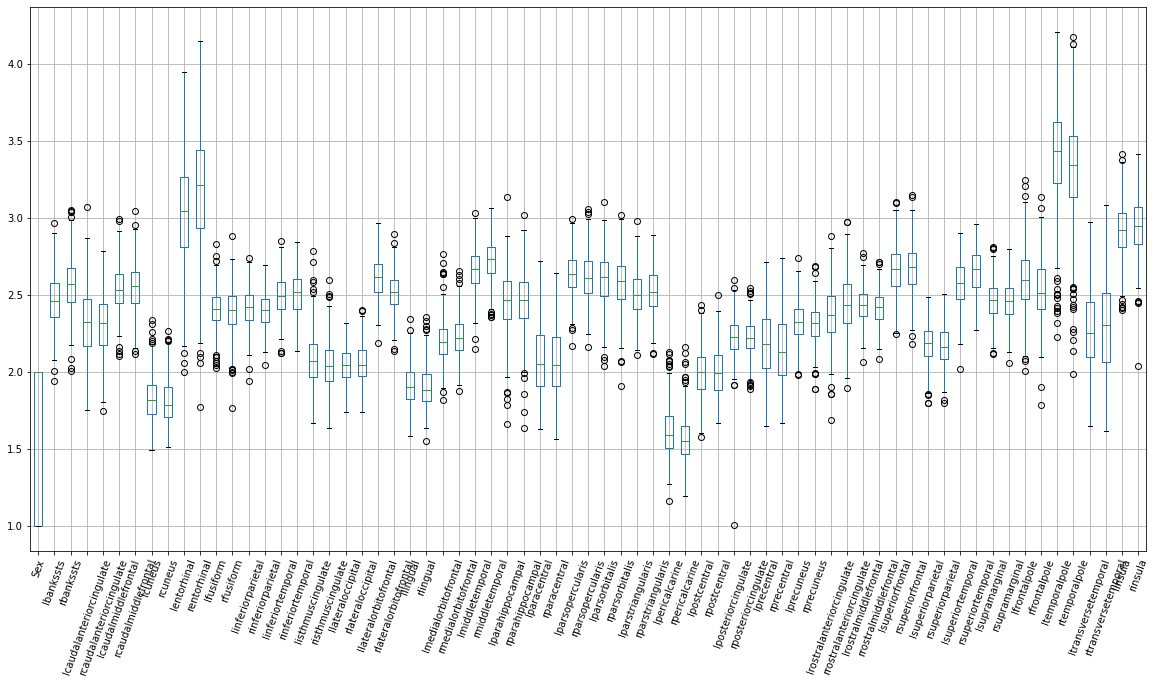

In [10]:
plt.figure(figsize=(20, 10))
X_train.iloc[:,:-1].boxplot(rot=70)
plt.savefig("images/Data_magnitude.png")


In [53]:
#Original SVM regression
from sklearn.svm import SVR
from copy import deepcopy
svm_search = {"pca__n_components" : [27, 28, 29, 30,],
              "svr__kernel" : ["rbf"],
              "svr__C" : np.logspace(0, 6, 13),
              "svr__gamma" : np.logspace(-3, 3, 13)}


svm_model = make_pipeline(standard_preprocess, PCA(), SVR())
svm_grid = GridSearchCV(svm_model, svm_search, verbose=2,return_train_score=True)

svm_grid.fit(X_train, y_train)
print(svm_grid.best_estimator_)
best_svm = svm_grid.best_estimator_

print("test accuracy")
print(best_svm.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(svm_grid.score(X_val,y_val))
print(svm_grid.best_score_)


abs_expect = pd.DataFrame(best_svm.predict(X_abs_test))
Cobre_expect = pd.DataFrame(best_svm.predict(X_Cobre_test))

#abs_expect.to_csv("temp_submit/69_svm_absresult.csv")
#Cobre_expect.to_csv("temp_submit/69_svm_cobre.csv")

Fitting 5 folds for each of 676 candidates, totalling 3380 fits
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s

[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3.1622776601683795

[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10.0, svr__gamma=1

[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.622776601683793, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31.62

[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100.0, svr__gamma=3

[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316.22776601683796, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=

[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=3162.2776601683795, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31

[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=10000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr

[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=31622.776601683792, svr__gamma=0.3

[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=100000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_comp

[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.7660168379, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=316227.766016

[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=27, svr__C=1000000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END 

[CV] END pca__n_components=28, svr__C=1.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.1622776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.1622776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.1622776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.1622776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.1622776601683795, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3.16227766

[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=10.

[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31.622776601683793, svr__gamma=0.3

[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100.0, svr__gamma=3.1622776

[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316.22776601683796, svr__gamma=3

[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000.0, sv

[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.2776601683795, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=3162.27766

[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.001, svr__kernel=rbf; total time=   0.2s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.001, svr__kernel=rbf; total time=   0.4s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.001, svr__kernel=rbf; total time=   0.4s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=31622.776601683792, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.1s
[CV] END pca__n_componen

[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=100000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=

[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=316227.7660168379, svr__gamma=0.3162277660

[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, svr__C=1000000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=28, 

[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1.0, svr__gamma=316.22776601683796, s

[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3.1622776601683795, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=

[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31.622776601683793, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_componen

[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100.0, svr__gamm

[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316.22776601683796, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31

[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000.0, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100

[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=3162.2776601683795, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316

[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=10000.0, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_compone

[CV] END pca__n_components=29, svr__C=31622.776601683792, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31622.776601683792, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31622.776601683792, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=31622.776601683792, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=100000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.4s
[CV] END pca__n_components=29, svr__C=100000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.4s
[CV] END pca__n_components=29, svr__C=100000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.3s
[CV] END pca__n_components=29, svr__C=100000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.3s
[CV] END pca__n_components=29, svr__C=100000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.5s
[CV] END pca__n_components=29, svr__C=

[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.1s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=316227.7660168379, svr__gamma=0.0

[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=29, svr__C=1000000.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=

[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1.0, svr__gamma=3.1622776601683795, svr__kerne

[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3.1622776601683795, svr__gamma=3

[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10.0, svr__gamm

[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31.622776601683793, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.0s
[CV] END pca_

[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.0031622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22776601683796, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316.22

[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.03162277660168379, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000.0, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr_

[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=3162.2776601683795, svr__gamma=0.31622776601683794, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31

[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=1.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=10000.0, sv

[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=3.1622776601683795, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=10.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=31622.776601683792, svr__gamma=3

[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=31.622776601683793, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=100.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=100000.0, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30,

[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=316.22776601683796, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=316227.7660168379, svr__gamma=1000.0, svr__kernel=rbf; total time=   0.0s
[CV] END pca__n_components=30, svr__C=1000000.0, svr__gamma=0.001, svr__kernel=rbf; total time=   0.3s
[CV] END pca__n_components=30, svr__C=1000000.0, svr__gamma=0.001, svr__kernel=rbf; total

In [16]:
#PCA SVM regression
#
#log_svm = TransformedTargetRegressor(SVR(), func=np.log, inverse_func=np.exp)
svm_grid.cv_results_[]
#print(svm_grid.best_score_)


{'mean_fit_time': array([0.01364818, 0.01918573, 0.01635375, 0.01536217, 0.0145606 ,
        0.01375365, 0.01776814, 0.01483078, 0.01591001, 0.01859617,
        0.01654916, 0.01918411, 0.01735191, 0.01456013, 0.01634974,
        0.01635032, 0.01701159, 0.01549015, 0.01291733, 0.01592937,
        0.0190661 , 0.01568861, 0.0177525 , 0.01736112, 0.01595759,
        0.01815124, 0.01575637, 0.01256447, 0.01460505, 0.01249781,
        0.0168201 , 0.01915035, 0.01775203, 0.01475983, 0.0167542 ,
        0.01852045, 0.01881642, 0.02163482, 0.01900687, 0.01669827,
        0.01874657, 0.01495275, 0.01562972, 0.01949148, 0.01656027,
        0.01922193, 0.01655598, 0.01855035, 0.0207458 , 0.01758313,
        0.02169151, 0.01748991, 0.01661134, 0.01696391, 0.02485461,
        0.01974468, 0.01614938, 0.01836281, 0.02254148, 0.0153707 ,
        0.01810913, 0.01873808, 0.01874642, 0.01803527, 0.02053471,
        0.01775217, 0.02553029, 0.03011866, 0.02056251, 0.01688085,
        0.01749129, 0.02274365,

In [ ]:
results = pd.DataFrame(svm_grid.cv_results_)
results.plot('param_pca__n_components', 'mean_train_score')
results.plot('param_pca__n_components', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_pca__n_components.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_pca__n_components.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)

plt.legend()
plt.xscale("log")

results.param_svr__C.to_numpy()

In [90]:
results = pd.DataFrame(svm_grid.cv_results_)
#results.plot('param_svr__gamma', 'mean_train_score')
results.plot('param_svr__gamma', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_svr__gamma.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_svr__gamma.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)

plt.legend()
plt.xscale("log")


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [74]:
#PCA Elasticnet
from sklearn.linear_model import ElasticNet
elasticnet_process = make_pipeline(standard_preprocess,ElasticNet())

elasticnet_search = {"pca__n_components" : [58, 60, 64, 65, 66, 67],
                     "elasticnet__l1_ratio" : [0.015 ,0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
                     "elasticnet__alpha" : [10, 1, 0.5, 0.1, 0.05, 0.01, 0.001]}

elastic_model = make_pipeline(standard_preprocess, PCA(), ElasticNet())
elastic_grid = GridSearchCV(elastic_model,elasticnet_search,verbose=2)
elastic_grid.fit(X_train, y_train)
print(elastic_grid.best_estimator_)
best_elastic = elastic_grid.best_estimator_

print("test accuracy")
print(best_elastic.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(best_elastic.score(X_val,y_val))

abs_expect = pd.DataFrame(best_elastic.predict(X_abs_test))
Cobre_expect = pd.DataFrame(best_elastic.predict(X_Cobre_test))

#abs_expect.to_csv("temp_submit/elastic_absresult.csv")
#Cobre_expect.to_csv("temp_submit/elastic_cobre.csv")

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elast

[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet_

[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.2, pca__n_components=67; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.2, pca__n_components=67; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.2, pca__n_components=67; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=10, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet_

[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.05, pca__n_components=64; total time=   0.0s
[CV] END elasticnet_

[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=1, elasticnet__l1_ratio=0.2, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=1, 

[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.01, pca__n_components=65; total time=   0.0s


[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.5, elasticnet__l1_ratio=0.15, pca__n_components=66; total time=   0.0s


[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.015, pca__n_components=65; total tim

[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.1, pca__n_components=65; total time=   0.0s
[CV] END e

[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.1, elasticnet__l1_ratio=0.3, pca__n_components=65; total time=   0.0s
[CV] END e

[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.05, pca__n_components=64; total tim

[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.05, elasticnet__l1_ratio=0.2, pca__n_components=64; total time=   0.0s


[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.01, pca__n_components=65; total tim

[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=65; total time=   0.0s
[CV] END elasticnet__alpha=0.01, elasticnet__l1_ratio=0.15, pca__n_components=65; total tim

[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.015, pca__n_comp

[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=58; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.1, pca__n_components=64; total tim

[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=60; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=64; total time=   0.0s
[CV] END elasticnet__alpha=0.001, elasticnet__l1_ratio=0.3, pca__n_components=64; total tim

In [111]:

# y_val_predict_data = best_elastic.predict(X_val)
# y_val_predict_data =  pd.DataFrame(y_val_predict_data)
# y_val_filtered_df = y_val_predict_data.applymap(threshold_function)

# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_val, filtered_df)
# mse2 = mean_squared_error(y_val,best_elastic.predict(X_val))
# print(mse)
# print(mse2)
elastic_grid.best_score_



0.6754724247313737

In [13]:
#log regressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNet
log_elastic = TransformedTargetRegressor(ElasticNet(), func=np.log, inverse_func=np.exp)

elasticnet_search = {"pca__n_components" : [50, 60, 65, 70],
                     "transformedtargetregressor__regressor__l1_ratio" : [0.2, 0.3, 0.5, 0.6, 0.8],
                     "transformedtargetregressor__regressor__alpha" : [10, 1, 0.1, 0.01, 0.001]}

log_elastic_model = make_pipeline(standard_preprocess, PCA(), log_elastic)

log_ela_grid = GridSearchCV(log_elastic_model, elasticnet_search,verbose=2)

log_ela_grid.fit(X_train,y_train)


print(log_ela_grid.best_estimator_)
best_log_elastic = log_ela_grid.best_estimator_

print("test accuracy")
print(best_log_elastic.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(best_log_elastic.score(X_val,y_val))



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_component

[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.1, t

[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=50, transformedtargetregressor__regressor__

[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=1, transformedtarg

[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.2; total time=   0.0s
[CV] END pca__n_components=60, transformedtargetregressor__regressor__a

[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.3; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=0.01, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=65, transformedtargetregressor__regressor__alpha=

[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.5; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=10, transfor

[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.6; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.1, t

[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
[CV] END pca__n_components=70, transformedtargetregressor__regressor__alpha=0.001, transformedtargetregressor__regressor__l1_ratio=0.8; total time=   0.0s
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                        

In [179]:
#Original Lasso
from sklearn.linear_model import Lasso
Lasso_process = make_pipeline(standard_preprocess, Lasso())

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = make_pipeline(standard_preprocess, PCA(),LogisticRegression())

['PCALasso', ElasticNet()]

In [27]:
#Original Randomforest
from sklearn.ensemble import RandomForestRegressor
randomforest_process = make_pipeline(standard_preprocess, RandomForestRegressor())

X_train.shape
forest.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                StandardScaler())]),
                     transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                    ['Sex'])])),
  ('pca', PCA()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                              StandardScaler())]),
                   transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                  ['Sex'])]),
 'pca': PCA(),
 'randomforestregressor': RandomForestRegressor(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder__memory': None,
 'columntransformer__remainder__steps': [('standardscaler', StandardScaler())],
 'columntransformer__remainder__verbose': False,
 'columntransformer__remainder__stan

In [39]:
#PCA Randomforest
from sklearn.ensemble import RandomForestRegressor

forest_params = {"randomforestregressor__ccp_alpha" : [1, 0.1, 0.01, 0.001],
                "randomforestregressor__max_features" : [35,36,37,38],
                "randomforestregressor__max_depth" : [4,5,6,7,8,9,10,11,12]}

sk = StratifiedKFold(n_splits=10,random_state=613,shuffle = True)
forest = make_pipeline(standard_preprocess, PCA(), RandomForestRegressor())

forest_gd = GridSearchCV(forest, forest_params, cv=sk, verbose=2)

forest_gd.fit(X_train, y_train)

print(forest_gd.best_estimator_)
best_forest = forest_gd.best_estimator_

print("test accuracy")
print(best_forest.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(best_forest.score(X_val,y_val))

abs_expect = pd.DataFrame(best_forest.predict(X_abs_test))
Cobre_expect = pd.DataFrame(best_forest.predict(X_Cobre_test))

abs_expect.to_csv("temp_submit/Randomforest_absresult.csv")
Cobre_expect.to_csv("temp_submit/Randomfroest_cobre.csv")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomfores

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=5, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomfores

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=7, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=7, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=7, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=7, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=7, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomfores

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=8, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomfores

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=10, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=10, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=10, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomfo

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=11, randomforestregressor__max_features=37; total time=   0.4s
[CV] END rand

[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=1, randomforestregressor__max_depth=12, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=4, randomforestregressor__max_features=35; total time=   0.2s
[CV] END ran

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=5, randomforestregressor__max_features=36; total time=   0.3s
[CV] E

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=6, randomforestregressor__max_features=38; total time=   0.3s
[CV] E

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=8, randomforestregressor__max_features=36; total time=   0.4s
[CV] E

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=9, randomforestregressor__max_features=38; total time=   0.4s
[CV] E

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=11, randomforestregressor__max_features=36; total time=   0.4s

[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.1, randomforestregressor__max_depth=12, randomforestregressor__max_features=37; total time=   0.4s

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=5, randomforestregressor__max_features=35; total time=   0.3s

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=36; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=6, randomforestregressor__max_features=37; total time=   0.4s

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=7, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=7, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=7, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=7, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=8, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=8, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=8, randomforestregressor__max_features=35; total time=   0.5s

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=9, randomforestregressor__max_features=37; total time=   0.4s

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=10, randomforestregressor__max_features=38; total time=

[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.01, randomforestregressor__max_depth=12, randomforestregressor__max_features=36; total time=

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=37; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=37; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=37; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=37; total time=   0.2s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=38; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=4, randomforestregressor__max_features=38; total time=

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=6, randomforestregressor__max_features=35; total time=

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.3s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=7, randomforestregressor__max_features=37; total time=

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=8, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=8, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=8, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=9, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=9, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=9, randomforestregressor__max_features=35; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=9, randomforestregressor__max_features=35; total time=

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=36; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=10, randomforestregressor__max_features=37; tota

[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.5s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; total time=   0.4s
[CV] END randomforestregressor__ccp_alpha=0.001, randomforestregressor__max_depth=11, randomforestregressor__max_features=38; tota

In [36]:
#PCA ADAboosting
from sklearn.ensemble import AdaBoostRegressor
pd.DataFrame(forest_gd.cv_results_["mean_test_score"])
forest_gd.cv_results_

# from sklearn.compose import TransformedTargetRegressor
# log_regressor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
# cross_val_score(make_pipeline(preprocess, log_regressor), X_train, y_train, cv=5)



#618
# Pipeline(steps=[('columntransformer',
#                  ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
#                                                               StandardScaler())]),
#                                    transformers=[('onehotencoder',
#                                                   OneHotEncoder(drop='first'),
#                                                   ['Sex'])])),
#                 ('pca', PCA()),
#                 ('randomforestregressor',
#                  RandomForestRegressor(max_depth=9, max_features=35))])


#6015
# Pipeline(steps=[('columntransformer',
#                  ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
#                                                               StandardScaler())]),
#                                    transformers=[('onehotencoder',
#                                                   OneHotEncoder(drop='first'),
#                                                   ['Sex'])])),
#                 ('pca', PCA()),
#                 ('randomforestregressor',
#                  RandomForestRegressor(max_depth=11, max_features=38))])
# test accuracy


{'mean_fit_time': array([0.30418582, 0.3012233 , 0.31325953, 0.32333276, 0.32223382,
        0.32005248, 0.34767296, 0.36453552, 0.36771848, 0.38261168,
        0.38578348, 0.39554217, 0.3970484 , 0.40271308, 0.42741525,
        0.40809345, 0.41641724, 0.44424739, 0.43334506, 0.43383815,
        0.4585572 , 0.46796198, 0.47522337, 0.45817606, 0.4549933 ,
        0.45738535, 0.44929869, 0.46805837, 0.48870513, 0.4870065 ,
        0.47881379, 0.49327142, 0.5093183 , 0.51538453, 0.53544984,
        0.50265684, 0.46994057, 0.48221138, 0.4872046 , 0.5412591 ,
        0.5202503 , 0.54095943, 0.53281386, 0.5335202 , 0.56478701,
        0.57021573, 0.54416435, 0.56932282, 0.55880144, 0.52933152,
        0.5826879 , 0.56109724, 0.55743594, 0.55513415]),
 'std_fit_time': array([0.01712026, 0.00962784, 0.00917119, 0.02193586, 0.00763911,
        0.00352141, 0.0212777 , 0.0152542 , 0.00817201, 0.01961107,
        0.01973929, 0.01729201, 0.03215439, 0.02227361, 0.03289378,
        0.01504645, 0.010

In [16]:
#Original GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
GBM_process = make_pipeline(standard_preprocess, GradientBoostingRegressor())


abs_predict_data =  pd.DataFrame(best_forest.predict(X_abs_test))
abs_filtered_df = abs_predict_data.applymap(threshold_function)

Cobre_predict_data = pd.DataFrame(best_forest.predict(X_Cobre_test))
Cobre_filtered_df = Cobre_predict_data.applymap(threshold_function)

abs_filtered_df.to_csv("temp_submit/inovation_Randomforest_absresult.csv")
Cobre_filtered_df.to_csv("temp_submit/inovation_Randomfroest_cobre.csv")


y_val_predict_data = best_forest.predict(X_val)
y_val_predict_data =  pd.DataFrame(y_val_predict_data)
y_val_filtered_df = y_val_predict_data.applymap(threshold_function)

print("before filtering, accuracy")
print(best_forest.score(X_val,y_val), "\n\n\n")
print("After filtering, accuracy")
print(best_forest.score(X_val,filtered_df))

print(abs_filtered_df)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, filtered_df)
mse2 = mean_squared_error(y_val,best_forest.predict(X_val))
print(mse)
print(mse2)


NameError: name 'best_forest' is not defined

In [152]:
#PCA GBM
from sklearn.ensemble import GradientBoostingRegressor
pca_GBM_process = deepcopy(pca_process)
pca_GBM_process.steps.append(["PCA_GBM", GradientBoostingRegressor()])
pca_GBM_process.get_params()
pca_GBM_process.steps.pop()

['PCA_GBM', GradientBoostingRegressor()]

In [181]:
#Original XGBM
from xgboost import XGBRegressor
GBM_process = make_pipeline(standard_preprocess, XGBRegressor())




In [230]:
#PCA XGBM

#check_PCA = list(range(30,40, 2))
XGBM_seach_param = {
    "xgbregressor__n_estimators" : [250, 300, 350],
    "xgbregressor__learning_rate" : [0.01, 0.1, 0.01],
    "xgbregressor__max_depth" : [2, 4, 6],
    "xgbregressor__reg_alpha" : [0, 1, 2, 3]
}

pca_XGBM_process = make_pipeline(standard_preprocess, PCA(), XGBRegressor())

#pca_XGBM_process.get_params()
rsf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state = 16516)#
sf =StratifiedKFold(n_splits=10, random_state=153)


grid_search = GridSearchCV(pca_XGBM_process, param_grid=XGBM_seach_param, cv=sf, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train
#fitting 시킴으로 평균값과 sigma, standard deviation, w 모델 저장
#n_job으로 쓸 cpu core
print(grid_result.best_estimator_)
XGBM = grid_result.best_estimator_

print("test accuracy")
print(XGBM.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(XGBM.score(X_val,y_val))


#print(grid_result.cv_results_)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sk

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex'])])),
                ('pca', PCA(n_components=32)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=2, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                       

In [215]:
import lightgbm
pca_XGBM_process.get_params()
#pca_XGBM_process.steps.append(["PCA_XGBM", XGBRegressor()])

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                StandardScaler())]),
                     transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                    ['Sex'])])),
  ('pca', PCA()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=Non

In [108]:
#PCA XGBM
from xgboost import XGBRegressor
check_PCA = list(range(10, 60, 5))
check_PCA.append(None)
XGBM_seach_param = {
    "pca__n_components" : [10, 20, 30, 40],
    "xgbregressor__n_estimators" : [100, 200, 300],
    "xgbregressor__learning_rate" : [0.001, 0.01, 0.1, 1, 10 ,100],
    "xgbregressor__max_depth" : [2, 4, 6]
}

pca_XGBM_process = make_pipeline(standard_preprocess, PCA(), XGBRegressor())

#pca_XGBM_process.get_params()
rsf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state = 16516)########################rnadom vairlble
grid_search = GridSearchCV(pca_XGBM_process, param_grid=XGBM_seach_param,verbose=2)
grid_result = grid_search.fit(X_train, y_train)######################################## iloc을 바꿈
#fitting 시킴으로 평균값과 sigma, standard deviation, w 모델 저장

print(grid_result.best_estimator_)
XGBM = grid_result.best_estimator_

print("test accuracy")
print(XGBM.score(X_train,y_train),"\\n\n\n")

print("validation accuracy")
print(XGBM.score(X_val,y_val))

abs_expect = pd.DataFrame(XGBM.predict(X_abs_test))
Cobre_expect = pd.DataFrame(XGBM.predict(X_Cobre_test))

abs_expect.to_csv("temp_submit/absresult.csv")
Cobre_expect.to_csv("temp_submit/cobre.csv")
#print(grid_result.cv_results_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.001, xgbreg

[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s

[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] E

[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w


[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=10, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0

[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s

[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_comp

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=20, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=

[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s

[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.1s
[CV] E

[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_com

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=30, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.001, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0

[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s

[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.2s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.2s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] END pca__n_components=40, xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.3s
[CV] E

[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_comp

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=10, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=2, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w


[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=4, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=200; total time=   0.0s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 622, in score
    return self.steps[-1][-1].score(Xt, y, **score_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_w

[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
[CV] END pca__n_components=40, xgbregressor__learning_rate=100, xgbregressor__max_depth=6, xgbregressor__n_estimators=300; total time=   0.1s
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex'])])),
                ('pca', PCA(n_components=20)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                     

In [15]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
abs_before = pd.read_csv("temp_submit/absresult.csv")
cobre_before = pd.read_csv("temp_submit/cobre.csv")
abs_before = abs_before.iloc[:,1]
abs_before.round()

def threshold_function(df):
    decimal_part = df - np.floor(df)
    if (decimal_part <= 0.3):
        return np.floor(df)
    elif (0.7 <= decimal_part):
        return np.floor(df) + 1
    return df


XGB = XGBRegressor(n_estimators=300,random_state=0,reg_alpha=0,reg_lambda=1)


xgb = make_pipeline(standard_preprocess,PCA(n_components=32),XGB)
xgb.fit(X_train,y_train)

print("filtered accuracy")
filtered_df = pd.DataFrame(xgb.predict(X_val))
filtered_df = filtered_df.applymap(threshold_function)

#print(xgb.score(X_val,y_val))
print(xgb.score(X_val,filtered_df))


print(y_val,filtered_df)
#abs_before.apply(threshold_function)
#0.5에선 확실하지 않잖아?
#하지만 0.1, 0.2, 0.3과 0.7 0.8 0.9 같은 경우에는 filter해도 될 듯?

filtered accuracy
0.9998390193303341
229    47.0
30     63.0
39     34.0
226    38.0
127    68.0
207    61.0
320    60.0
215    45.0
474    71.0
79     32.0
470    81.0
410    60.0
78     37.0
398    53.0
288    67.0
281    26.0
72     52.0
96     23.0
160    55.0
0      36.0
400    37.0
84     32.0
380    63.0
369    63.0
432    58.0
317    60.0
176    29.0
180    28.0
18     24.0
9      22.0
441    62.0
462    68.0
75     25.0
238    46.0
297    53.0
420    32.0
55     56.0
93     57.0
376    76.0
81     38.0
336    44.0
464    56.0
213    41.0
177    27.0
189    73.0
74     46.0
151    64.0
Name: Age, dtype: float64             0
0   48.000000
1   56.000000
2   33.491695
3   49.583504
4   61.380821
5   61.545807
6   49.000000
7   58.389938
8   59.000000
9   46.000000
10  61.000000
11  37.634823
12  29.000000
13  57.000000
14  49.363972
15  36.000000
16  43.000000
17  29.559994
18  44.000000
19  45.000000
20  31.000000
21  47.000000
22  52.000000
23  65.000000
24  62.478584
25  54.00

In [32]:
pca_XGBM_process.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                StandardScaler())]),
                     transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                    ['Sex'])])),
  ('pca', PCA()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=Non